In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

### Challenge 1

In [3]:
# Read data into pandas dataframe
df = pd.read_csv('2013_movies.csv')

In [4]:
# Create intercept only model
intercept_model = smf.ols("DomesticTotalGross ~ 1", df).fit()

When using an intercept only model, what we end up predicting is the mean of our response variable which in this case is the mean of Domestic Total Gross.

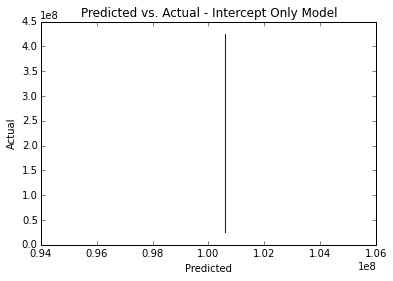

In [5]:
# Plot predictions against actual.
plt.plot(intercept_model.predict(), df.DomesticTotalGross)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs. Actual - Intercept Only Model')

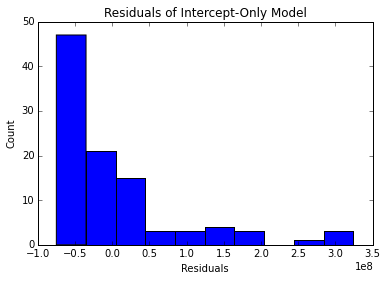

In [7]:
#Plot historgram of residuals
plt.hist(intercept_model.resid)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Residuals of Intercept-Only Model')

The residuals are not distributed normally.  There are far more residuals closer to the mean and it drops as the higher residuals come into play.

### Challenge 2

In [8]:
df_clean = df.dropna()

# Adding Budget to model
model_1 = smf.ols("DomesticTotalGross ~ Budget", df_clean).fit()

(0.0, 250000000.0)

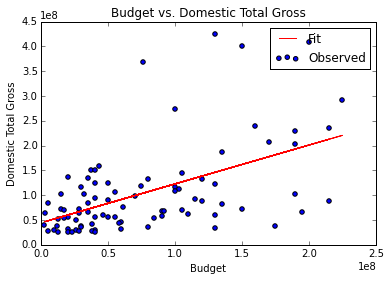

In [9]:
# Plots budget against gross and plots the line of best fit (predictions).
plt.figure()
plt.scatter(df_clean.Budget, df_clean.DomesticTotalGross, label='Observed')
best_fit = model_1.params['Intercept'] + model_1.params['Budget'] * df_clean.Budget
plt.plot(df_clean.Budget, best_fit, 'r', label='Fit')
plt.xlabel('Budget')
plt.ylabel('Domestic Total Gross')
plt.title('Budget vs. Domestic Total Gross')
plt.legend(loc='best')
plt.xlim(0.0)

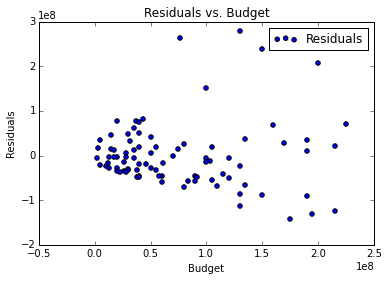

In [11]:
plt.figure()
plt.scatter(df_clean.Budget, model_1.resid, label='Residuals')
plt.xlabel('Budget')
plt.ylabel('Residuals')
plt.title('Residuals vs. Budget')
plt.legend(loc='best')

It appears that there is a cone shape to the residuals of this model.  There is much more variation in the residuals as budget gets larger whereas it should be more normally distributed around 0.  In other words, the higher the budget gets, the less accurate our predictions are  

### Challenge 3

In [2]:
my_df = pd.read_csv('dataframe.csv')
my_df_clean = my_df.dropna()
my_model = smf.ols("Domestic_Total_Gross ~ Budget + Genre", my_df_clean).fit()
print my_model.summary()

                             OLS Regression Results                             
Dep. Variable:     Domestic_Total_Gross   R-squared:                       0.430
Model:                              OLS   Adj. R-squared:                  0.420
Method:                   Least Squares   F-statistic:                     43.15
Date:                  Sun, 26 Apr 2015   Prob (F-statistic):          4.00e-106
Time:                          12:34:39   Log-Likelihood:                -19081.
No. Observations:                   990   AIC:                         3.820e+04
Df Residuals:                       972   BIC:                         3.829e+04
Df Model:                            17                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept             1.772e+07   5.73e+06      3.095      0.002      6.49e+06   2.9e+07
Genr

The genre appears to have added some information, yet now there seems to be multicollinearity issues.  The genres are categorical variables and they have a base variable which in this case is Action movies.

### Challenge 4

In [3]:
my_model_A = smf.ols("np.log(UK_Total_Gross) ~ np.log(Budget) + British * Genre", my_df_clean).fit()
print my_model_A.summary()

                              OLS Regression Results                              
Dep. Variable:     np.log(UK_Total_Gross)   R-squared:                       0.995
Model:                                OLS   Adj. R-squared:                  0.995
Method:                     Least Squares   F-statistic:                     5965.
Date:                    Sun, 26 Apr 2015   Prob (F-statistic):               0.00
Time:                            12:34:51   Log-Likelihood:                -1503.4
No. Observations:                     990   AIC:                             3071.
Df Residuals:                         958   BIC:                             3227.
Df Model:                              32                                         
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                        7.5920      0.657     11.5

When adding genre to the model, it appears to increase my R-squared by quite a bit.  This is worrisome to me because it doesn't make sense and it will have to be looked into further.  The genre's all have a "base" genre which is action and the rest of the genres are being compared on performance to that base.    

###Challenge 5

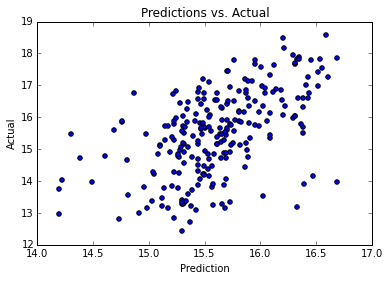

In [4]:
df_train = my_df_clean[:750]
df_test = my_df_clean[750:]

model_train = smf.ols("np.log(UK_Total_Gross) ~ np.log(Budget) + British * Genre", df_train).fit()

Y_pred = model_train.predict(df_test)

plt.scatter(Y_pred, np.log(df_test.UK_Total_Gross))
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Predictions vs. Actual')